In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Observed data

In [2]:
df = pd.read_csv("data_regions_20200124-to-20200504.csv", parse_dates=["date"])

In [3]:
df = df.groupby("date").sum()

In [4]:
df

cas_confirmes    deces  deces_ehpad  reanimation  hospitalises  \
date                                                                         
2020-01-24           17.0      0.0          0.0          0.0          17.0   
2020-01-25           21.0      0.0          0.0          0.0          21.0   
2020-01-26           17.0      0.0          0.0          0.0          17.0   
2020-01-27           22.0      0.0          0.0          0.0          22.0   
2020-01-28           33.0      0.0          0.0          0.0          33.0   
...                   ...      ...          ...          ...           ...   
2020-04-22        21190.0  13193.0          0.0       5098.0       29531.0   
2020-04-23        21190.0  13503.0          0.0       4938.0       29022.0   
2020-04-24        21190.0  13807.0          0.0       4758.0       28460.0   
2020-04-25        21190.0  14005.0          0.0       4616.0       28029.0   
2020-04-26        21190.0  14157.0          0.0       4572.0       28018.0   

             gueris  depistes  diff  elapsed_days  
date                                               
2020-01-24      0.0       0.0   0.0           0.0  
2020-01-25      0.0       0.0  13.0          13.0  
2020-01-26      0.0       0.0  13.0          26.0  
2020-01-27      0.0       0.0  13.0          36.0  
2020-01-28      0.0       0.0  13.0          48.0  
...             ...       ...   ...           ...  
2020-04-22  40338.0       0.0  13.0         800.0  
2020-04-23  41760.0       0.0  13.0         813.0  
2020-04-24  43159.0       0.0  13.0         826.0  
2020-04-25  44257.0       0.0  13.0         839.0  
2020-04-26  44559.0       0.0  13.0         852.0  

[94 rows x 9 columns]

In [5]:
pop_france =sum([656955, 526050, 331315, 165197, 141756, 1079396, 326875, 265531, 152398, 309907, 372705, 278360, 2034469, 691453, 142811, 348180, 647080, 296404, 240336, 532886, 596186, 116270, 408393, 539449, 520560, 600687, 429425, 906554, 748468, 1400935, 190040, 1633440, 1176145, 1082073, 217139, 605380, 1264979, 257849, 411979, 327835, 764737, 226901, 1437137, 682890, 173166, 330336, 76286, 815881, 490669, 563823, 169250, 305365, 730398, 181641, 755566, 1035866, 199596, 2588988, 825077, 276903, 1452778, 660240, 683169, 226839, 479000, 1132607, 763204, 1876051, 233194, 547824, 560227, 432548, 828405, 2148271, 1243788, 1423607, 1448625, 372627, 569769, 387898, 262618, 1073836, 560997, 683187, 437398, 370774, 359520, 332096, 140145, 1319401, 1613762, 1670149, 1406041, 1248354, 162421, 182258])

# Micromodel data

In [37]:
df_micro = pd.read_csv("../build/micromodel_output.csv")

In [38]:
df_micro = df_micro[["day", "S", "E", "A", "I1", "I2", "R", "D"]]

In [39]:
df_micro

day      S    E    A   I1   I2      R     D
0      0  64408  124  137   55   79    109    63
1      1  64342  152   42  122  137    117    63
2      2  64298  157   39  140  150    124    67
3      3  64243  177   36  161  157    132    69
4      4  64170  206   46  181  158    138    76
..   ...    ...  ...  ...  ...  ...    ...   ...
155  155  18478    0    0    1    1  43992  2503
156  156  18478    0    0    1    1  43992  2503
157  157  18478    0    0    0    1  43993  2503
158  158  18478    0    0    0    1  43993  2503
159  159  18478    0    0    0    0  43994  2503

[160 rows x 8 columns]

In [40]:
pop_micro = df_micro.iloc[0].sum()

# Visualize

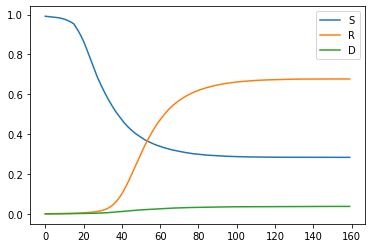

In [41]:
fig, ax = plt.subplots()
ax.plot(df_micro["S"] / pop_micro, label="S")
ax.plot(df_micro["R"] / pop_micro, label="R")
ax.plot(df_micro["D"] / pop_micro, label="D")
plt.legend()
plt.show()

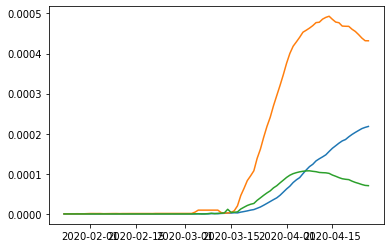

In [42]:
fig, ax = plt.subplots()
ax.plot(df["deces"] / pop_france, label="deces")
ax.plot(df["hospitalises"] / pop_france, label="hosp")
ax.plot(df["reanimation"] / pop_france, label="rea")
plt.show()

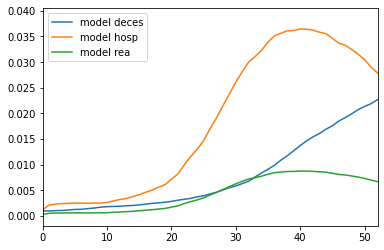

In [43]:
fig, ax = plt.subplots()
ax.plot(df_micro["D"] / pop_micro, label="model deces")
ax.plot(df_micro["I2"] / pop_micro, label="model hosp")
ax.plot(.24 * df_micro["I2"] / pop_micro, label="model rea")
plt.legend()
plt.xlim(0, 52)
plt.show()

## Superpose

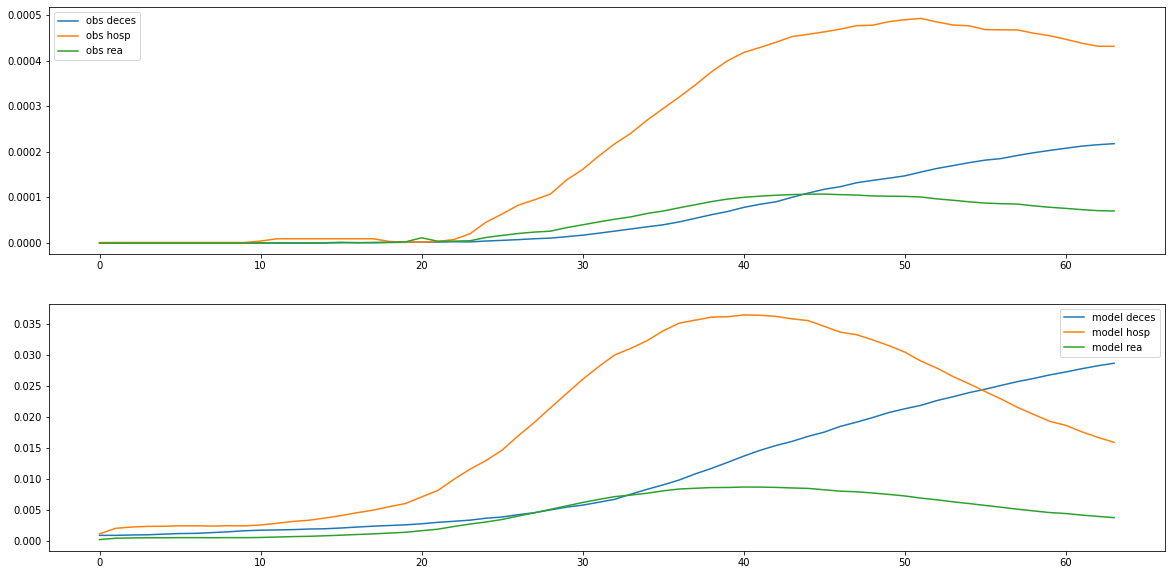

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(df["deces"].values[30:] / pop_france, label="obs deces")
ax[0].plot(df["hospitalises"].values[30:] / pop_france, label="obs hosp")
ax[0].plot(df["reanimation"].values[30:] / pop_france, label="obs rea")
ax[0].legend()
ax[1].plot(df_micro["D"].values[:64] / pop_micro, label="model deces")
ax[1].plot(df_micro["I2"].values[:64] / pop_micro, label="model hosp")
ax[1].plot(.24 * df_micro["I2"].values[:64] / pop_micro, label="model rea")
ax[1].legend()
plt.show()